###Xente Fraud Detection Challenge

Xente is an e-payments, e-commerce, and financial services company in Uganda
offering various products and services that can be paid for using Mobile Money
(Airtel Money, MTN Mobile Money), Bank Card (Visa Card, Master Card), Xente
wallet and on credit (Pay Later). Some of the products consumers can buy include
airtime, data bundles, pay water and electricity bills, TV subscription services, buy
event tickets, movie tickets, bus tickets, and more is an e-payments, e-commerce, and financial services company in Uganda
offering various products and services that can be paid for using Mobile Money
(Airtel Money, MTN Mobile Money), Bank Card (Visa Card, Master Card), Xente
wallet and on credit (Pay Later). Some of the products consumers can buy include
airtime, data bundles, pay water and electricity bills, TV subscription services, buy
event tickets, movie tickets, bus tickets, and more

The objective of this competition is to create a machine learning model to detect
fraudulent transactions.
Fraud detection is an important application of machine learning in the financial
services sector. This solution will help Xente provide improved and safer service to
its customers

In [1]:
#Importing important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt

from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import make_multilabel_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
%matplotlib inline

In [2]:
#Importing dataset
xfd = pd.read_csv('XFDdataset.csv')
xfd

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-1000.0,1000,2019-02-13T09:54:09Z,2,0
95658,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2019-02-13T09:54:25Z,2,0
95659,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2019-02-13T09:54:35Z,2,0
95660,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,UGX,256,ProviderId_6,ProductId_19,tv,ChannelId_3,3000.0,3000,2019-02-13T10:01:10Z,2,0


DATA INSPECTION

In [3]:
#To check the data type
type(xfd)

pandas.core.frame.DataFrame

In [4]:
#Data inspection
#To check the first 10 rows of te dataset
xfd.head(10)

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0
5,TransactionId_23223,BatchId_25954,AccountId_1078,SubscriptionId_4238,CustomerId_1432,UGX,256,ProviderId_6,ProductId_3,airtime,ChannelId_3,2000.0,2000,2018-11-15T03:35:10Z,2,0
6,TransactionId_118063,BatchId_118460,AccountId_2442,SubscriptionId_1980,CustomerId_2858,UGX,256,ProviderId_5,ProductId_3,airtime,ChannelId_3,10000.0,10000,2018-11-15T03:44:31Z,4,0
7,TransactionId_100640,BatchId_38561,AccountId_4841,SubscriptionId_3829,CustomerId_2858,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-500.0,500,2018-11-15T03:45:13Z,2,0
8,TransactionId_51905,BatchId_93774,AccountId_272,SubscriptionId_4731,CustomerId_598,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,500.0,500,2018-11-15T04:14:59Z,2,0
9,TransactionId_130161,BatchId_82409,AccountId_710,SubscriptionId_920,CustomerId_1053,UGX,256,ProviderId_1,ProductId_15,financial_services,ChannelId_3,600.0,600,2018-11-15T04:31:48Z,2,0


In [5]:
#To check the last 10 rows of te dataset
xfd.tail(10)

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
95652,TransactionId_71994,BatchId_66957,AccountId_620,SubscriptionId_1833,CustomerId_960,UGX,256,ProviderId_1,ProductId_15,financial_services,ChannelId_3,1700.0,1700,2019-02-13T09:50:20Z,2,0
95653,TransactionId_68851,BatchId_100900,AccountId_4841,SubscriptionId_3829,CustomerId_539,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-140.0,140,2019-02-13T09:50:34Z,2,0
95654,TransactionId_18130,BatchId_20310,AccountId_620,SubscriptionId_1833,CustomerId_960,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,1000.0,1000,2019-02-13T09:52:31Z,2,0
95655,TransactionId_38907,BatchId_92168,AccountId_4841,SubscriptionId_3829,CustomerId_960,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-50.0,50,2019-02-13T09:52:49Z,2,0
95656,TransactionId_68402,BatchId_17092,AccountId_2659,SubscriptionId_3327,CustomerId_3078,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,50000.0,50000,2019-02-13T09:53:55Z,2,0
95657,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-1000.0,1000,2019-02-13T09:54:09Z,2,0
95658,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2019-02-13T09:54:25Z,2,0
95659,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2019-02-13T09:54:35Z,2,0
95660,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,UGX,256,ProviderId_6,ProductId_19,tv,ChannelId_3,3000.0,3000,2019-02-13T10:01:10Z,2,0
95661,TransactionId_35670,BatchId_29317,AccountId_4841,SubscriptionId_3829,CustomerId_1709,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-60.0,60,2019-02-13T10:01:28Z,2,0


In [6]:
xfd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

In [7]:
#To check aggregate
xfd.describe().T

,count,mean,std,min,25%,50%,75%,max
CountryCode,95662.0,256.000000,0.000000,256.0,256.0,256.0,256.0,256.0
Amount,95662.0,6717.846433,123306.797164,-1000000.0,-50.0,1000.0,2800.0,9880000.0
Value,95662.0,9900.583941,123122.087776,2.0,275.0,1000.0,5000.0,9880000.0
PricingStrategy,95662.0,2.255974,0.732924,0.0,2.0,2.0,2.0,4.0
FraudResult,95662.0,0.002018,0.044872,0.0,0.0,0.0,0.0,1.0


In [8]:
#To show the columns in the dataset
xfd.columns

Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId',
       'ProductCategory', 'ChannelId', 'Amount', 'Value',
       'TransactionStartTime', 'PricingStrategy', 'FraudResult'],
      dtype='object')

In [9]:
#To see all the values in the dataset
xfd.values

array([['TransactionId_76871', 'BatchId_36123', 'AccountId_3957', ...,
        '2018-11-15T02:18:49Z', 2, 0],
       ['TransactionId_73770', 'BatchId_15642', 'AccountId_4841', ...,
        '2018-11-15T02:19:08Z', 2, 0],
       ['TransactionId_26203', 'BatchId_53941', 'AccountId_4229', ...,
        '2018-11-15T02:44:21Z', 2, 0],
       ...,
       ['TransactionId_82501', 'BatchId_118602', 'AccountId_4841', ...,
        '2019-02-13T09:54:35Z', 2, 0],
       ['TransactionId_136354', 'BatchId_70924', 'AccountId_1346', ...,
        '2019-02-13T10:01:10Z', 2, 0],
       ['TransactionId_35670', 'BatchId_29317', 'AccountId_4841', ...,
        '2019-02-13T10:01:28Z', 2, 0]], dtype=object)

In [10]:
#To check the shape (the numbers of rows and columns)
xfd.shape

(95662, 16)

In [11]:
#To check for missing values
xfd.isna().sum()

TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64

###Data cleaning

In [12]:
#To deal wit6h date
xfd['TransactionStartTime']=pd.to_datetime(xfd.TransactionStartTime)
xfd.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15 02:18:49+00:00,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15 02:19:08+00:00,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15 02:44:21+00:00,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15 03:32:55+00:00,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15 03:34:21+00:00,2,0


In [13]:
##Feature engineering
#seperate date to month, year and day and time

###Data cleaning

In [14]:

xfd.columns

Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId',
       'ProductCategory', 'ChannelId', 'Amount', 'Value',
       'TransactionStartTime', 'PricingStrategy', 'FraudResult'],
      dtype='object')

In [15]:
xfd.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15 02:18:49+00:00,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15 02:19:08+00:00,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15 02:44:21+00:00,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15 03:32:55+00:00,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15 03:34:21+00:00,2,0


In [16]:
#To drop irrelevant column
xfd2 = xfd.drop(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId'], axis=1)
xfd2.head()

,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15 02:18:49+00:00,2,0
1,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15 02:19:08+00:00,2,0
2,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15 02:44:21+00:00,2,0
3,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15 03:32:55+00:00,2,0
4,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15 03:34:21+00:00,2,0


In [17]:
xfd2.sort_values('FraudResult', ascending = False).head()

,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
14659,CustomerId_4453,UGX,256,ProviderId_1,ProductId_15,financial_services,ChannelId_3,4000000.0,4000000,2018-12-04 12:19:36+00:00,0,1
86836,CustomerId_3075,UGX,256,ProviderId_5,ProductId_22,utility_bill,ChannelId_3,599392.0,629374,2019-02-06 09:10:06+00:00,2,1
64357,CustomerId_1302,UGX,256,ProviderId_3,ProductId_15,financial_services,ChannelId_3,2000000.0,2000000,2019-01-18 15:09:59+00:00,2,1
55728,CustomerId_1984,UGX,256,ProviderId_1,ProductId_15,financial_services,ChannelId_3,540000.0,540000,2019-01-10 13:39:14+00:00,2,1
70492,CustomerId_1988,UGX,256,ProviderId_3,ProductId_15,financial_services,ChannelId_3,50000.0,50000,2019-01-24 21:02:07+00:00,2,1


In [18]:
xfd2.columns

Index(['CustomerId', 'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId',
       'ProductCategory', 'ChannelId', 'Amount', 'Value',
       'TransactionStartTime', 'PricingStrategy', 'FraudResult'],
      dtype='object')

In [19]:
#To check unique entries in the columns
Incon=['ProviderId', 'ProductId',
       'ProductCategory', 'ChannelId', 'Amount', 'Value',
       'PricingStrategy', 'FraudResult']
for col in xfd2.columns:
    if col in Incon:
        print(xfd2[col].unique())

['ProviderId_6' 'ProviderId_4' 'ProviderId_1' 'ProviderId_5'
 'ProviderId_3' 'ProviderId_2']
['ProductId_10' 'ProductId_6' 'ProductId_1' 'ProductId_21' 'ProductId_3'
 'ProductId_15' 'ProductId_11' 'ProductId_19' 'ProductId_4' 'ProductId_5'
 'ProductId_20' 'ProductId_9' 'ProductId_24' 'ProductId_14' 'ProductId_2'
 'ProductId_13' 'ProductId_22' 'ProductId_8' 'ProductId_7' 'ProductId_27'
 'ProductId_12' 'ProductId_16' 'ProductId_23']
['airtime' 'financial_services' 'utility_bill' 'data_bundles' 'tv'
 'transport' 'ticket' 'movies' 'other']
['ChannelId_3' 'ChannelId_2' 'ChannelId_1' 'ChannelId_5']
[ 1.00e+03 -2.00e+01  5.00e+02 ... -4.70e+01  2.35e+05  5.89e+03]
[  1000     20    500 ...     47 235000   5890]
[2 4 1 0]
[0 1]


###Exploratory Data Analysis (EDA):

Text(0, 0.5, 'Fraud Count')

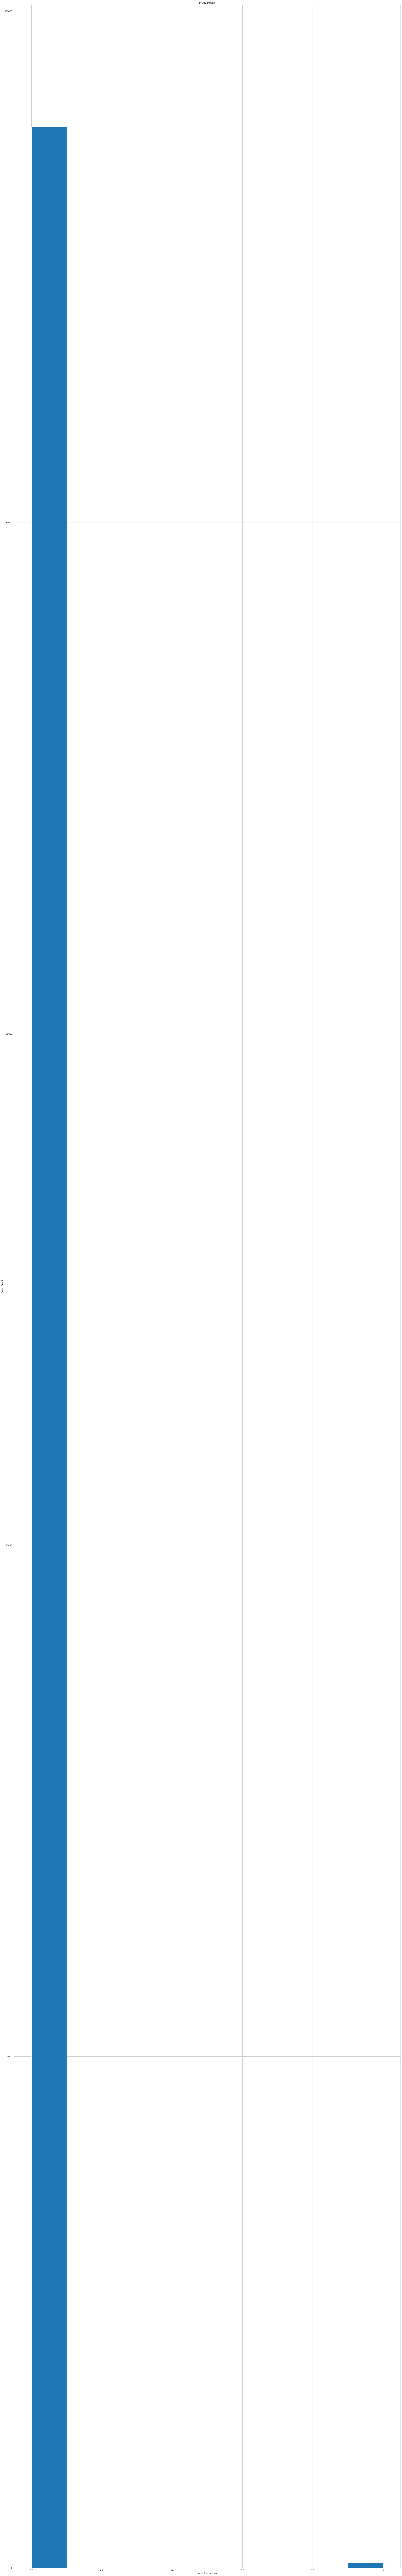

In [20]:

plt.figure(figsize=(30,200))
sns.set_style(style = 'whitegrid')
plt.title('Fraud Result')
plt.hist(xfd2.FraudResult)
plt.xlabel('No of Transactions')
plt.ylabel('Fraud Count')

Text(0, 0.5, 'Fraud Count')

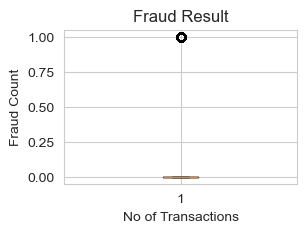

In [21]:
plt.figure(figsize=(3,2))
plt.title('Fraud Result')
plt.boxplot(xfd2.FraudResult)
plt.xlabel('No of Transactions')
plt.ylabel('Fraud Count')

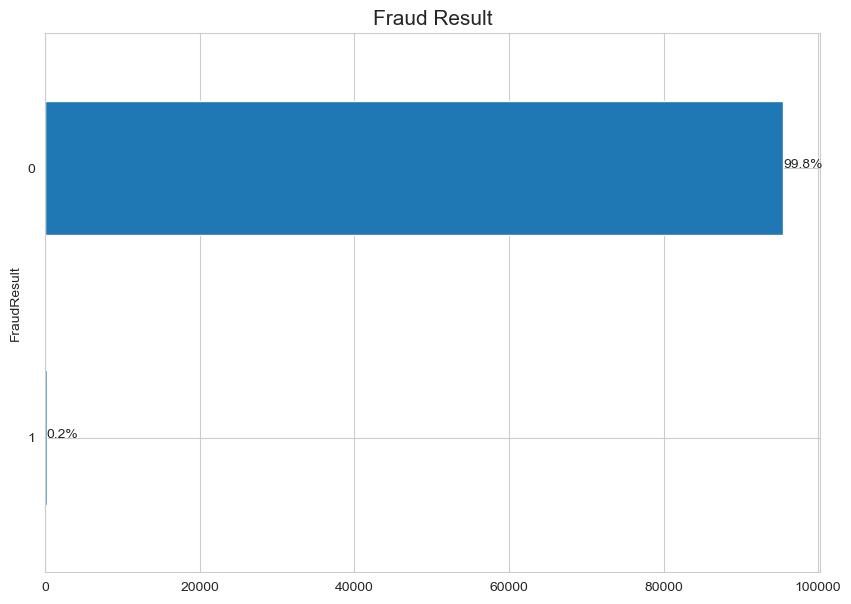

In [22]:
#To do a horizontal barchart
ax = xfd2['FraudResult'].value_counts().sort_values().plot(kind = 'barh', figsize=(10,7))
plt.title('Fraud Result', fontdict={'size': 15})
for p in ax.patches:
    percentage = '{:,.1f}%'.format((p.get_width()/xfd2.shape[0])*100)
    width, height = p.get_width(), p.get_height()
    x=p.get_x()+width+0.2
    y=p.get_y()+height/2
    ax.annotate(percentage, (x,y))

In [23]:
#To do a value count of 0s and 1s
xfd2['FraudResult'].value_counts()

FraudResult
0    95469
1      193
Name: count, dtype: int64

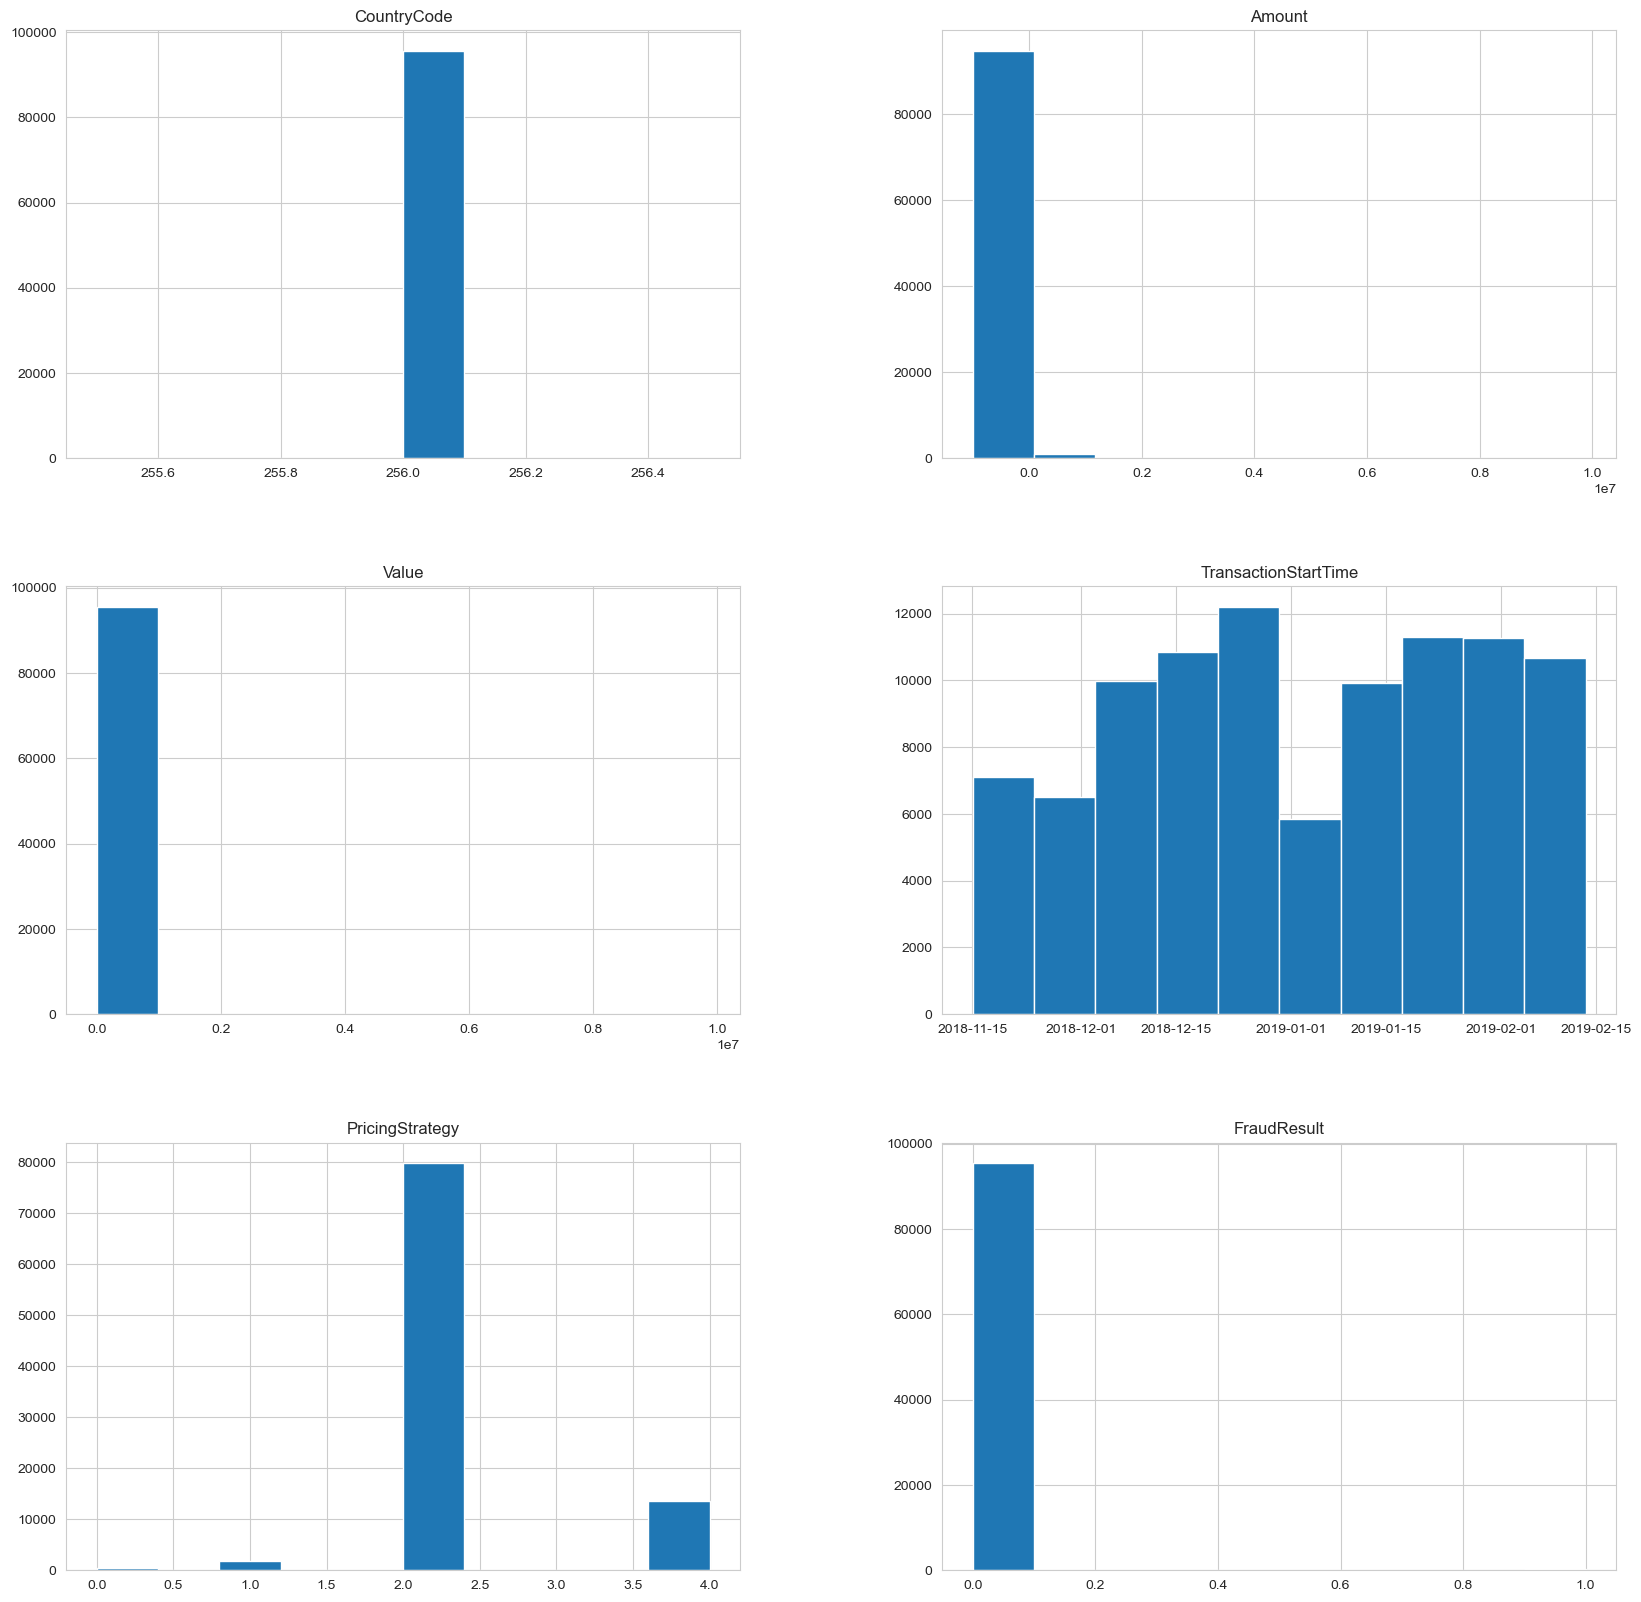

In [24]:
xfd2.hist(figsize=(20,20))
plt.show()

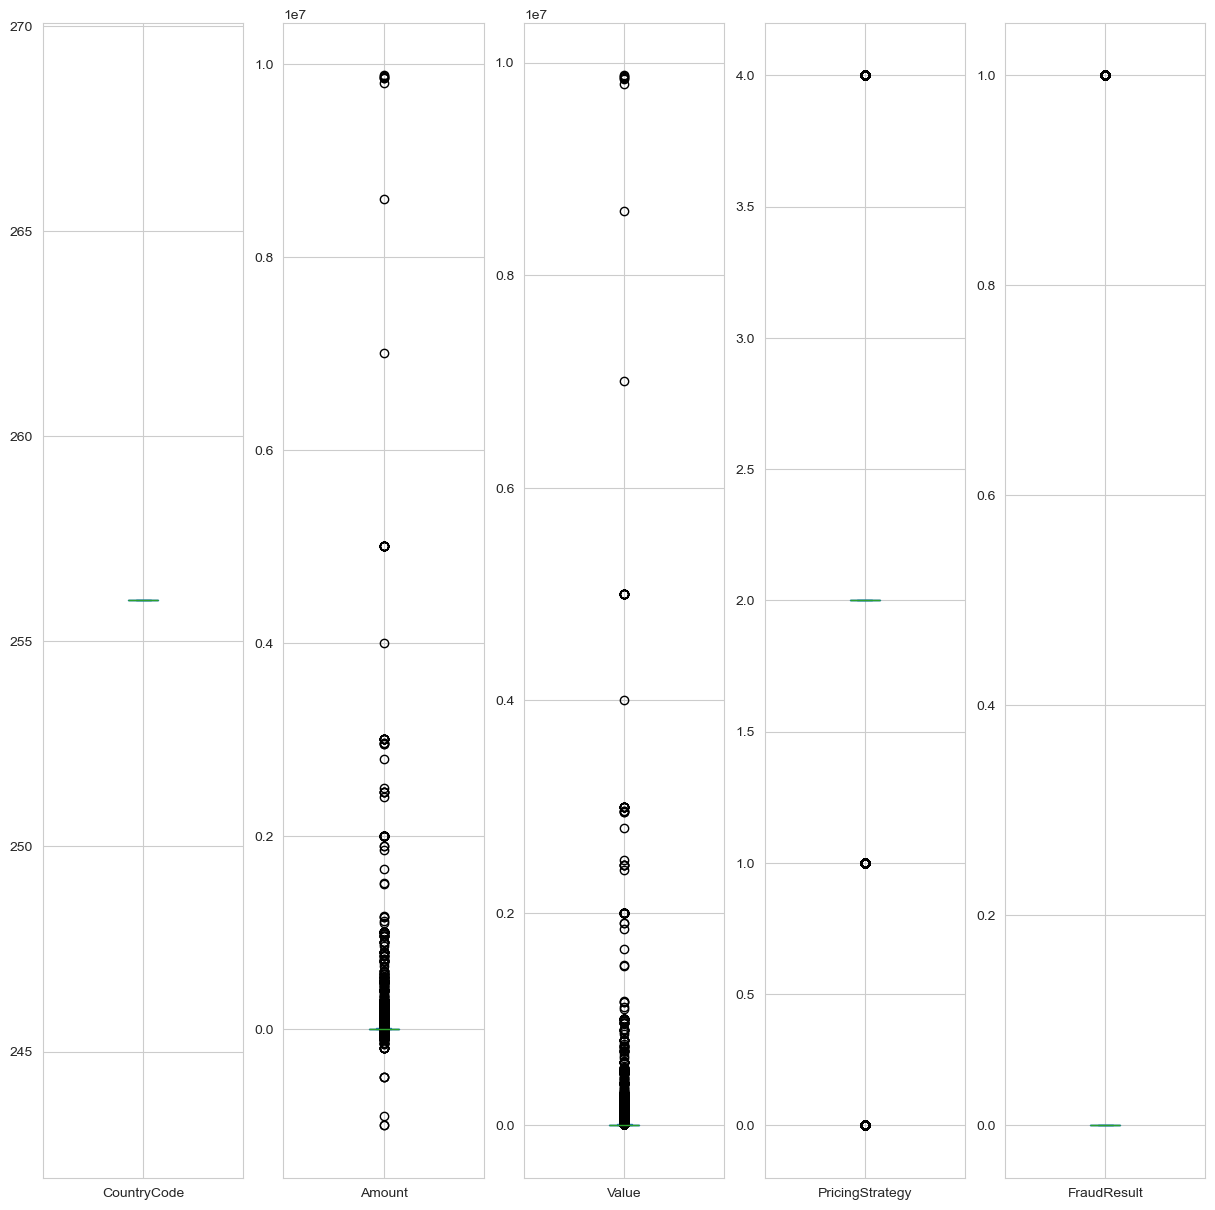

In [25]:
xfd2.plot(kind='box', figsize=(15,15), subplots=True, sharex=False, sharey=False)
plt.show()

### Data preprocessing

In [26]:
#Subsetting dataset variables into their various data type
date=['TransactionStartTime']
num=['Amount', 'Value', 'CountryCode', 'PricingStrategy']
cat=[col for col in xfd2.columns
    if col not in date + num + ['FraudResult']]

In [30]:
incon2=['ProviderId', 'ProductId',
       'ProductCategory', 'ChannelId', 'Amount', 'Value',
       'PricingStrategy']
incon2

['ProviderId',
 'ProductId',
 'ProductCategory',
 'ChannelId',
 'Amount',
 'Value',
 'PricingStrategy']

In [32]:
#Onehotencoding
xfd3 = pd.get_dummies(data=xfd2, columns=[col for col in incon2], dtype='int' , drop_first=True)
xfd3.head()

,CustomerId,CurrencyCode,CountryCode,TransactionStartTime,FraudResult,ProviderId_ProviderId_2,ProviderId_ProviderId_3,ProviderId_ProviderId_4,ProviderId_ProviderId_5,ProviderId_ProviderId_6,...,Value_8600000,Value_9800000,Value_9850000,Value_9856000,Value_9860888,Value_9870000,Value_9880000,PricingStrategy_1,PricingStrategy_2,PricingStrategy_4
0,CustomerId_4406,UGX,256,2018-11-15 02:18:49+00:00,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,CustomerId_4406,UGX,256,2018-11-15 02:19:08+00:00,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,CustomerId_4683,UGX,256,2018-11-15 02:44:21+00:00,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,CustomerId_988,UGX,256,2018-11-15 03:32:55+00:00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,CustomerId_988,UGX,256,2018-11-15 03:34:21+00:00,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [33]:
xfd3 = xfd3.drop(['CustomerId', 'CurrencyCode', 'TransactionStartTime'], axis=1)
xfd3.head()

,CountryCode,FraudResult,ProviderId_ProviderId_2,ProviderId_ProviderId_3,ProviderId_ProviderId_4,ProviderId_ProviderId_5,ProviderId_ProviderId_6,ProductId_ProductId_10,ProductId_ProductId_11,ProductId_ProductId_12,...,Value_8600000,Value_9800000,Value_9850000,Value_9856000,Value_9860888,Value_9870000,Value_9880000,PricingStrategy_1,PricingStrategy_2,PricingStrategy_4
0,256,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,256,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,256,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,256,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,256,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


Dealing with imbalanced data

In [34]:
#Dealing with imbalanced data
#Using hybrid sampling method
#Over sampling
from imblearn.over_sampling import SMOTE

#to resample the minority class
sm = SMOTE(sampling_strategy = 0.5, random_state = 42)

#To fit the model to generate data
x=xfd3.drop('FraudResult', axis=1)
y=xfd3['FraudResult']
print(y)
Oversampled_x, Oversampled_y = sm.fit_resample(x, y)

0        0
1        0
2        0
3        0
4        0
        ..
95657    0
95658    0
95659    0
95660    0
95661    0
Name: FraudResult, Length: 95662, dtype: int64


In [35]:
hybrid = pd.concat([pd.DataFrame(Oversampled_y), pd.DataFrame(Oversampled_x)], axis = 1)
hybrid.head()

,FraudResult,CountryCode,ProviderId_ProviderId_2,ProviderId_ProviderId_3,ProviderId_ProviderId_4,ProviderId_ProviderId_5,ProviderId_ProviderId_6,ProductId_ProductId_10,ProductId_ProductId_11,ProductId_ProductId_12,...,Value_8600000,Value_9800000,Value_9850000,Value_9856000,Value_9860888,Value_9870000,Value_9880000,PricingStrategy_1,PricingStrategy_2,PricingStrategy_4
0,0,256,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,256,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,256,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,256,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,256,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [36]:
hybrid['FraudResult'].value_counts()

FraudResult
0    95469
1    47734
Name: count, dtype: int64

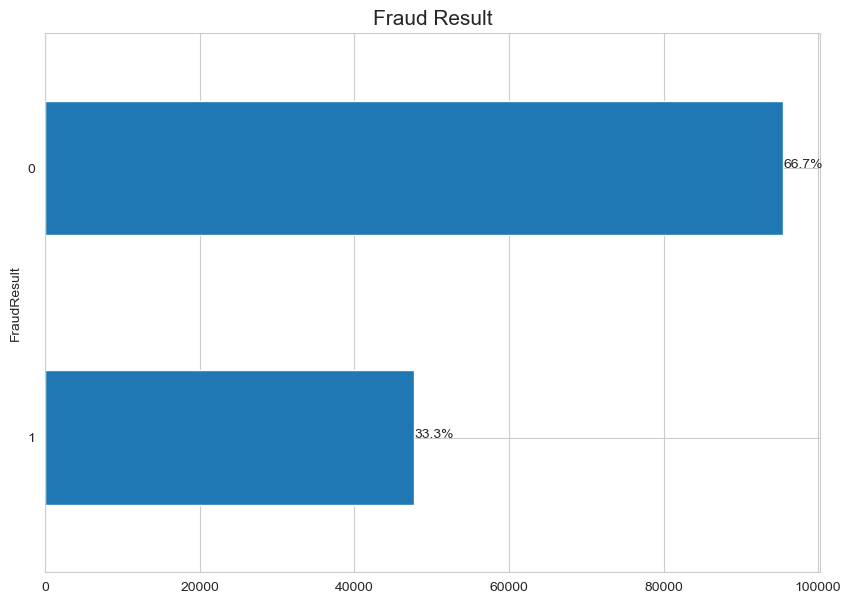

In [37]:
#To visualize it
ax = hybrid['FraudResult'].value_counts().sort_values().plot(kind = 'barh', figsize=(10,7))
plt.title('Fraud Result', fontdict={'size': 15})
for p in ax.patches:
    percentage = '{:,.1f}%'.format((p.get_width()/hybrid.shape[0])*100)
    width, height = p.get_width(), p.get_height()
    x=p.get_x()+width+0.2
    y=p.get_y()+height/2
    ax.annotate(percentage, (x,y))

In [38]:
#scaling
#Using min/max scalar
features = hybrid.drop('FraudResult', axis=1)
target = hybrid['FraudResult']
features.head()

,CountryCode,ProviderId_ProviderId_2,ProviderId_ProviderId_3,ProviderId_ProviderId_4,ProviderId_ProviderId_5,ProviderId_ProviderId_6,ProductId_ProductId_10,ProductId_ProductId_11,ProductId_ProductId_12,ProductId_ProductId_13,...,Value_8600000,Value_9800000,Value_9850000,Value_9856000,Value_9860888,Value_9870000,Value_9880000,PricingStrategy_1,PricingStrategy_2,PricingStrategy_4
0,256,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,256,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,256,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,256,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,256,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [39]:
#import library
from sklearn.preprocessing import MinMaxScaler

In [40]:
#To instantiate ie
scaler = MinMaxScaler(feature_range = (0,1))
rescaled_features = scaler.fit_transform(features)
print(rescaled_features)

[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]]


In [41]:
#To convert to a dataframe
rescaled_features = pd.DataFrame(rescaled_features, columns=features.columns)
rescaled_features.head()

,CountryCode,ProviderId_ProviderId_2,ProviderId_ProviderId_3,ProviderId_ProviderId_4,ProviderId_ProviderId_5,ProviderId_ProviderId_6,ProductId_ProductId_10,ProductId_ProductId_11,ProductId_ProductId_12,ProductId_ProductId_13,...,Value_8600000,Value_9800000,Value_9850000,Value_9856000,Value_9860888,Value_9870000,Value_9880000,PricingStrategy_1,PricingStrategy_2,PricingStrategy_4
0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [42]:
rescaled_features.describe()

,CountryCode,ProviderId_ProviderId_2,ProviderId_ProviderId_3,ProviderId_ProviderId_4,ProviderId_ProviderId_5,ProviderId_ProviderId_6,ProductId_ProductId_10,ProductId_ProductId_11,ProductId_ProductId_12,ProductId_ProductId_13,...,Value_8600000,Value_9800000,Value_9850000,Value_9856000,Value_9860888,Value_9870000,Value_9880000,PricingStrategy_1,PricingStrategy_2,PricingStrategy_4
count,143203.0,143203.000000,143203.000000,143203.000000,143203.000000,143203.000000,143203.000000,143203.000000,143203.000000,143203.000000,...,143203.000000,143203.000000,143203.000000,143203.000000,143203.000000,143203.000000,143203.000000,143203.000000,143203.000000,143203.000000
mean,0.0,0.000126,0.116771,0.271000,0.193592,0.240149,0.110549,0.009616,0.000014,0.012667,...,0.000007,0.000007,0.000007,0.000007,0.000007,0.000007,0.000007,0.022367,0.779886,0.111848
std,0.0,0.011211,0.321149,0.444478,0.395114,0.427175,0.313574,0.097588,0.003737,0.111835,...,0.002643,0.002643,0.002643,0.002643,0.002643,0.002643,0.002643,0.147874,0.414325,0.315181
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
## To split into train and test dataset
x=features
y=target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=12)

In [44]:
x_train.shape

(100242, 3233)

In [45]:
x_test.shape

(42961, 3233)

In [46]:
y_train.shape

(100242,)

In [47]:
y_test.shape

(42961,)

In [48]:
x_train.head()

,CountryCode,ProviderId_ProviderId_2,ProviderId_ProviderId_3,ProviderId_ProviderId_4,ProviderId_ProviderId_5,ProviderId_ProviderId_6,ProductId_ProductId_10,ProductId_ProductId_11,ProductId_ProductId_12,ProductId_ProductId_13,...,Value_8600000,Value_9800000,Value_9850000,Value_9856000,Value_9860888,Value_9870000,Value_9880000,PricingStrategy_1,PricingStrategy_2,PricingStrategy_4
9587,256,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
66515,256,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1222,256,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
41309,256,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
70503,256,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [49]:
y_train.head()

9587     0
66515    0
1222     0
41309    0
70503    0
Name: FraudResult, dtype: int64

In [50]:
x_test.head()

,CountryCode,ProviderId_ProviderId_2,ProviderId_ProviderId_3,ProviderId_ProviderId_4,ProviderId_ProviderId_5,ProviderId_ProviderId_6,ProductId_ProductId_10,ProductId_ProductId_11,ProductId_ProductId_12,ProductId_ProductId_13,...,Value_8600000,Value_9800000,Value_9850000,Value_9856000,Value_9860888,Value_9870000,Value_9880000,PricingStrategy_1,PricingStrategy_2,PricingStrategy_4
37140,256,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
103176,256,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
17573,256,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
46965,256,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
60420,256,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [51]:
y_test.head()

37140     0
103176    1
17573     0
46965     0
60420     0
Name: FraudResult, dtype: int64

In [52]:
#Building model
#Random forest classifier

from sklearn.ensemble import RandomForestClassifier

#To instatiate the model
rf = RandomForestClassifier()

#To train the model with train dataset
model_rf =%time rf.fit(x_train, y_train)

CPU times: total: 2min 2s
Wall time: 2min 7s


In [53]:
#To predict
y_pred_rf = rf.predict(x_test)

#importing metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

#To calculate and view accuracy score for RandomForestClassifier


print ('Random Forest Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_rf)*100))
print ('\n Random Forest Model precision score: {0:0.4f}'.format(precision_score(y_test, y_pred_rf)*100))
print ('\n Random Forest Model recall score: {0:0.4f}'.format(recall_score(y_test, y_pred_rf)*100))
print ('\n Random Forest Model f1 score: {0:0.4f}'.format(f1_score(y_test, y_pred_rf)*100))

Random Forest Model accuracy score: 99.3459

 Random Forest Model precision score: 98.0692

 Random Forest Model recall score: 99.9930

 Random Forest Model f1 score: 99.0218


In [54]:
#confustion metrics
cm_rf=confusion_matrix(y_test, y_pred_rf)

print('confusion matrix\n\n', cm_rf)
print ('\n True positive (TP) =', cm_rf[1,1])
print ('\n True negative (TN) =', cm_rf[0,0])
print ('\n False positive (FP) =', cm_rf[0,1])
print ('\n False negetive (FN) =', cm_rf[1,0])

confusion matrix

 [[28458   280]
 [    1 14222]]

 True positive (TP) = 14222

 True negative (TN) = 28458

 False positive (FP) = 280

 False negetive (FN) = 1


<Axes: >

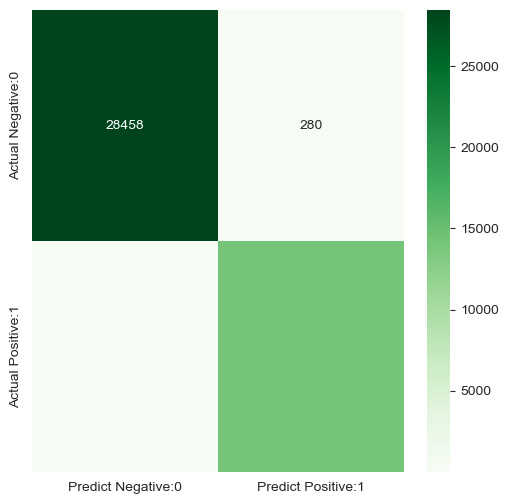

In [55]:
#To Visualize it using heatmap
plt.figure(figsize = (6,6))
sns.set_style('darkgrid')
cm_rf_matrix=pd.DataFrame(data=cm_rf, columns= ['Predict Negative:0', 'Predict Positive:1'], index= ['Actual Negative:0', 'Actual Positive:1'])
sns.heatmap(cm_rf_matrix, annot=True, fmt='d', cmap = plt.cm.Greens)

In [56]:
#To do a classification report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     28738
           1       0.98      1.00      0.99     14223

    accuracy                           0.99     42961
   macro avg       0.99      1.00      0.99     42961
weighted avg       0.99      0.99      0.99     42961



In [57]:
#Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

#To instatiate the model
dc = DecisionTreeClassifier()

#To train the model with train dataset
model_dc =%time rf.fit(x_train, y_train)

CPU times: total: 2min 4s
Wall time: 2min 5s


In [58]:
y_pred_dc=model_dc.predict(x_test)

In [59]:
#To calculate and view accuracy score for DecisionTreeClassifier

print ('Decision Tree Classifier accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_dc)*100))
print ('\n Decision Tree Classifier precision score: {0:0.4f}'.format(precision_score(y_test, y_pred_dc)*100))
print ('\n Decision Tree Classifier recall score: {0:0.4f}'.format(recall_score(y_test, y_pred_dc)*100))
print ('\n RDecision Tree Classifier f1 score: {0:0.4f}'.format(f1_score(y_test, y_pred_dc)*100))

Decision Tree Classifier accuracy score: 99.3529

 Decision Tree Classifier precision score: 98.0895

 Decision Tree Classifier recall score: 99.9930

 RDecision Tree Classifier f1 score: 99.0321


In [60]:
#confustion metrics
cm_dc=confusion_matrix(y_test, y_pred_dc)

print('confusion matrix\n\n', cm_dc)
print ('\n True positive (TP) =', cm_dc[1,1])
print ('\n True negative (TN) =', cm_dc[0,0])
print ('\n False positive (FP) =', cm_dc[0,1])
print ('\n False negetive (FN) =', cm_dc[1,0])

confusion matrix

 [[28461   277]
 [    1 14222]]

 True positive (TP) = 14222

 True negative (TN) = 28461

 False positive (FP) = 277

 False negetive (FN) = 1


<Axes: >

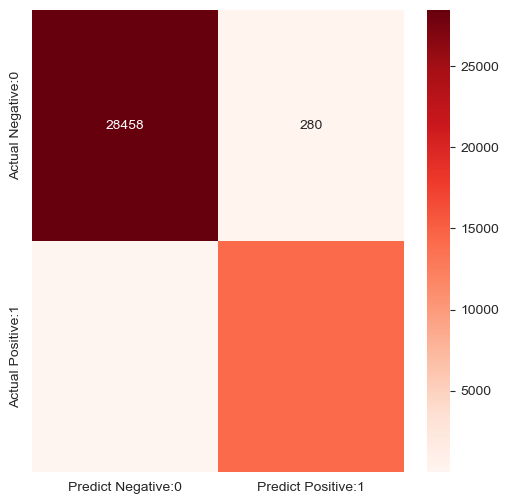

In [61]:
#To Visualize it using heatmap
plt.figure(figsize = (6,6))
sns.set_style('darkgrid')
cm_dc_matrix=pd.DataFrame(data=cm_rf, columns= ['Predict Negative:0', 'Predict Positive:1'], index= ['Actual Negative:0', 'Actual Positive:1'])
sns.heatmap(cm_rf_matrix, annot=True, fmt='d', cmap = plt.cm.Reds)

In [62]:
#To to a classification report
print(classification_report(y_test, y_pred_dc))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     28738
           1       0.98      1.00      0.99     14223

    accuracy                           0.99     42961
   macro avg       0.99      1.00      0.99     42961
weighted avg       0.99      0.99      0.99     42961



In [63]:
#creating a pandas series for all the metrics used
#for accuracy score
Acuracy_score =['Random forest model:', accuracy_score(y_test, y_pred_rf)*100, 'Decsion tree model =', accuracy_score(y_test, y_pred_dc)*100]
Accuracy_score =pd.Series([Accuracy_score])
Accuracy_score

NameError: name 'Accuracy_score' is not defined

In [ ]:
#concating series together to get dataframe

In [ ]:
cmm_df=cm_rf.reset_index(drop=True)
cmm_df

In [ ]:
#Decision tree
